# Car Prices Prediction Linear Multiple Regression

### Introduction

A new vehicle production company are about to launch their new line of cars and would like to know how the price tag to attach to each of their car brands, and I have been asked to make a model used to predict the price of each car. This is my first data science project, I obtained this data from the IBM Data Science course hosted on Coursera, I hope to get constructive criticism and also upvotes.

### Import Libraries

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import Data Sets

In [165]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [166]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [167]:
df = pd.read_csv(filename, names = headers)

In [168]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [169]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [170]:
df.shape

(205, 26)

### Data Cleaning

In [171]:
df.replace('?', np.nan, inplace=True)

In [172]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [173]:
mean_normalized = df['normalized-losses'].astype('float').mean(axis=0)
mean_horsepower = df['horsepower'].astype('float').mean(axis=0)
mean_stroke = df['stroke'].astype('float').mean(axis=0)
mean_bore = df['bore'].astype('float').mean(axis=0)
mean_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)

In [174]:
df['normalized-losses'].replace(np.nan, mean_normalized, inplace=True)
df['stroke'].replace(np.nan, mean_stroke, inplace=True)
df['bore'].replace(np.nan, mean_bore, inplace=True)
df['horsepower'].replace(np.nan, mean_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, mean_peakrpm, inplace=True)

In [175]:
missing_data = df.isnull().sum()
missing_data

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [176]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [177]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [178]:
df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [179]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [180]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[['horsepower']] = df[['horsepower']].astype("float")

In [181]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [182]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


###Exploratory Data Analysis

We would need a visual of the distribution of car prices



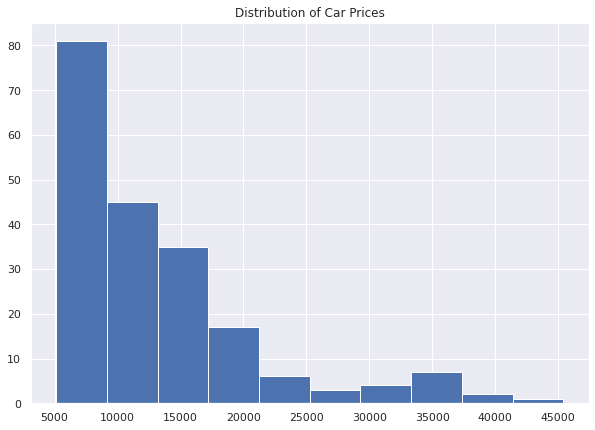

In [183]:
plt.figure(figsize=(10,7))
plt.title('Distribution of Car Prices')
df['price'].hist()

Deduction
Majority of the cars in our data have prices between 5,000 and 10,000

### Univariate Analysis

Here, let's see visuals of the denomination of categorical variables

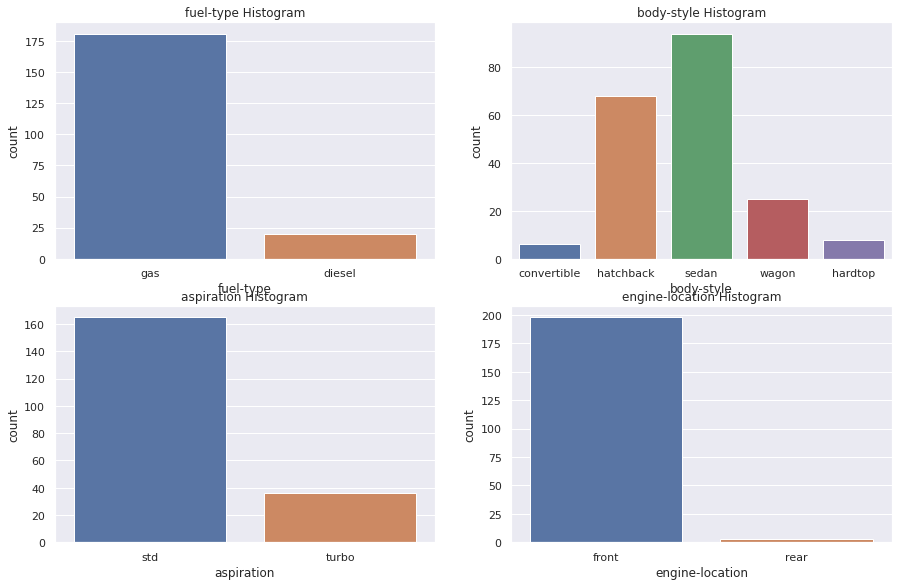

In [184]:
def plots(data, fig):
  plt.subplot(4,2,fig)
  sns.countplot(x = data, data = df)
  plt.title(data+ ' Histogram')

plt.figure(figsize=(15,20))

plots('fuel-type', 1)
plots('body-style', 2)
plots('aspiration', 3)
plots('engine-location', 4)

Deductions


1.   Most cars are use `gas` as their fuel source.
2.   A high number of the cars in our data are `sedans`.
3.   Majority of cars are `std` typed in aspiration.
4.   Most cars have their engines located that the `front`.



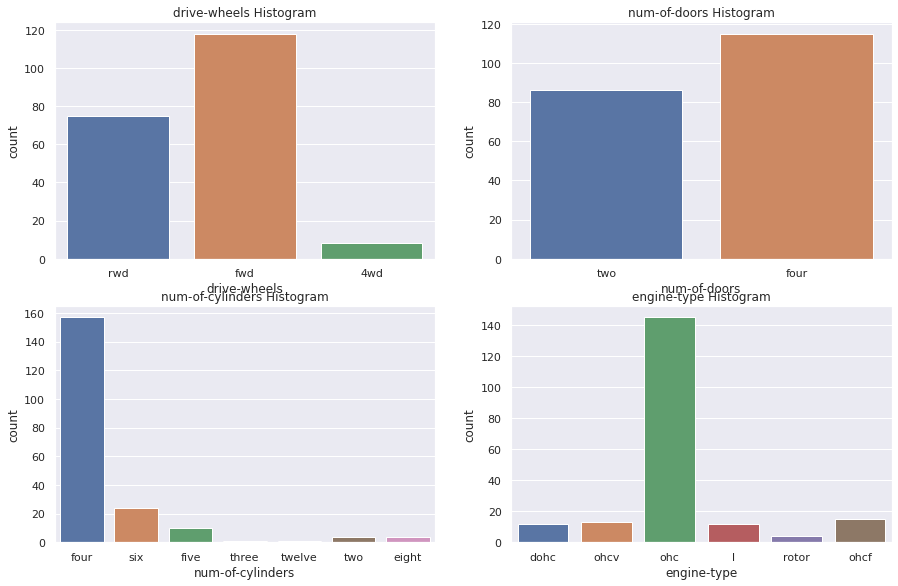

In [185]:
plt.figure(figsize=(15,20))
plots('drive-wheels', 1)
plots('num-of-doors', 2)
plots('num-of-cylinders', 3)
plots('engine-type', 4)

Deductions


1.   The data set is skewed towards the right with most cars having `four` doors.
2.   The data set shows that most cars have a cylinder number of `four`.
3.   We also see most engine types being `ohc`.
4.   Majority of the cars in our data are `fwd` cars.


### Bivariate Analysis

The objective in this section is to compare numerical and categorical variables to see how they affect care prices

Text(0, 0.5, 'Averge Price')

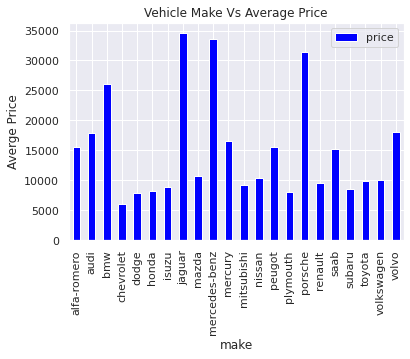

In [186]:
make = pd.DataFrame(df.groupby(['make'])['price'].mean())
make.head()
make.plot.bar(color='blue')
plt.title('Vehicle Make Vs Average Price')
plt.ylabel('Averge Price')

Deductions

1.   As expected it cars like `porsche`, `bmw`, `jaguar`, `audi`, and `mercedes-benz` stand out among the rest in terms of their average price. 


Plots Between Categorical Variables and Car Prices

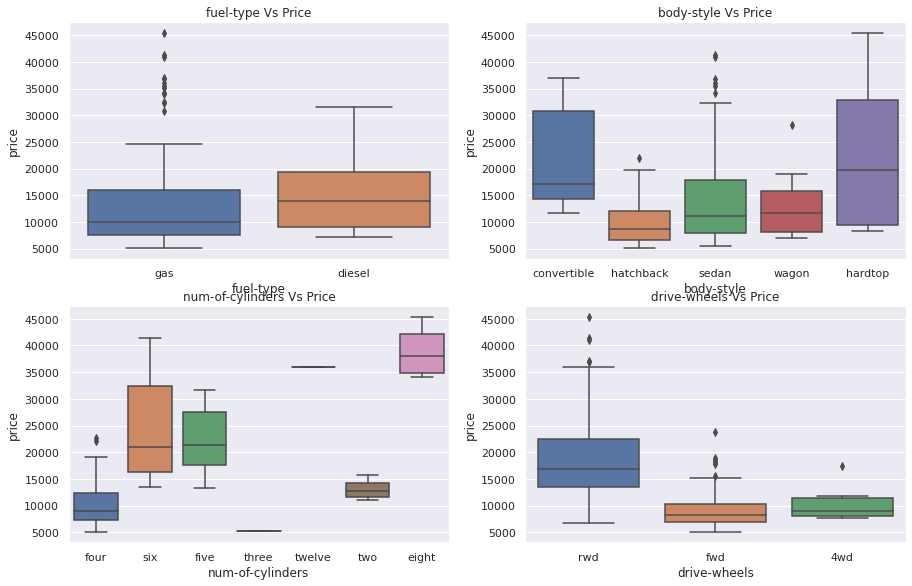

In [187]:
def box(dat, fig):
  plt.subplot(4, 2, fig)
  sns.boxplot(x = dat, y = df['price'], data = df)
  plt.title(dat+ ' Vs Price')

plt.figure(figsize=(15,20))
box('fuel-type', 1)
box('body-style', 2)
box('num-of-cylinders', 3)
box('drive-wheels', 4)

Deductions

1.   Diesel cars cost more than cars that use gas.
2.   Hardtop and convertible styled cars have the highest prices.
3.   Car prices seems to have a very strong correlation with the number of cylinders.
4.   rwd cars cost more than 4wd and fwd.



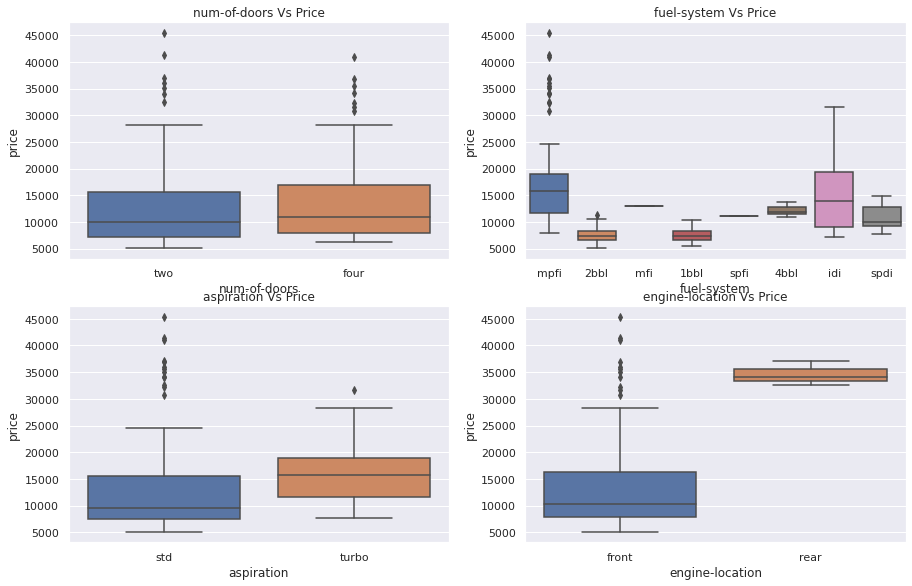

In [188]:
plt.figure(figsize=(15,20))
box('num-of-doors', 1)
box('fuel-system', 2)
box('aspiration', 3)
box('engine-location', 4)

Deductions


1.   The number of doors don't determine the price of cars.
2.   `ldi` and `mpfi` fuel systems have the highest prices.
3.    `turbo` cars cost more than `std` cars
4.    Cars with the engine located at the the rear cost more than those with their engines in the front.



Plots Between Numerical Variables and Car Prices

In [189]:
def pairs(x, fig):
  plt.subplot(4, 2, fig)
  plt.scatter(df[x], df['price'])
  plt.title(x+ ' Vs Price')
  plt.xlabel(x)
  plt.ylabel('Price')

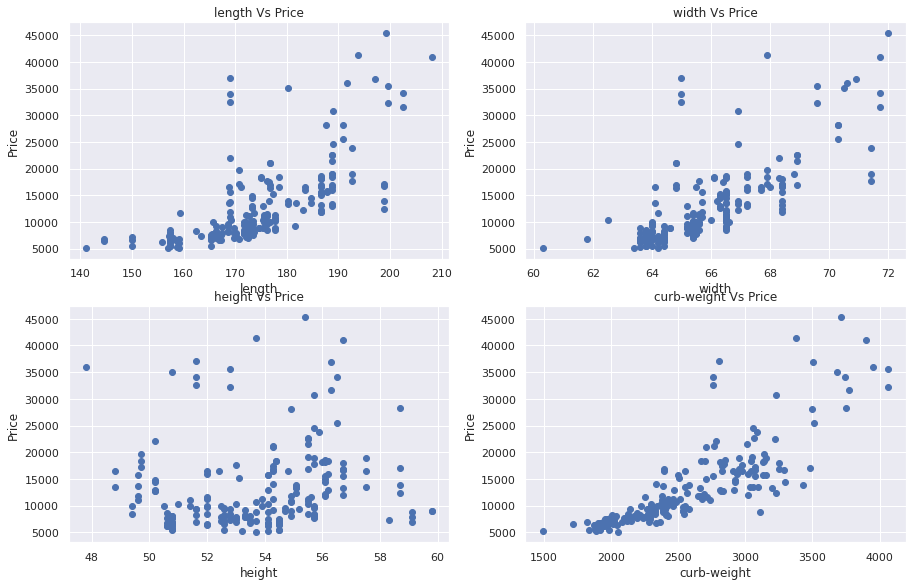

In [190]:
plt.figure(figsize=(15,20))
pairs('length', 1)
pairs('width', 2)
pairs('height', 3)
pairs('curb-weight', 4)

Deductions


1.   `length`, `width`, and `curb-weight` have strong positive relationships car prices.
2.   `height` has weak postive relationship with car prices.



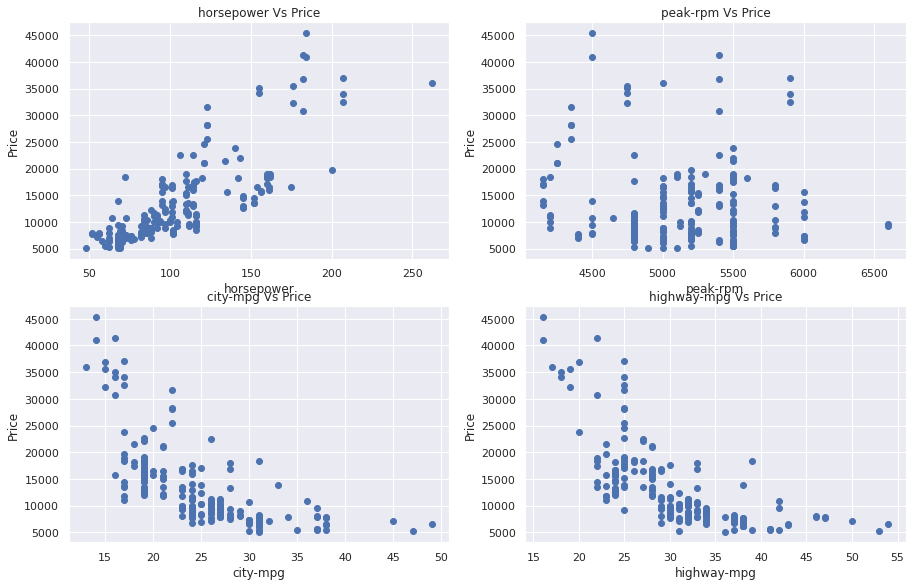

In [191]:
plt.figure(figsize=(15,20))
pairs('horsepower', 1)
pairs('peak-rpm', 2)
pairs('city-mpg', 3)
pairs('highway-mpg', 4)

Deductions


1.   `horsepower` has a strong positive relationship with car prices.
2.   `peak-rpm` has a weak relationship with car prices.
3.   `city-mpg` and `highway-mpg` have strong negative relationships with car prices.



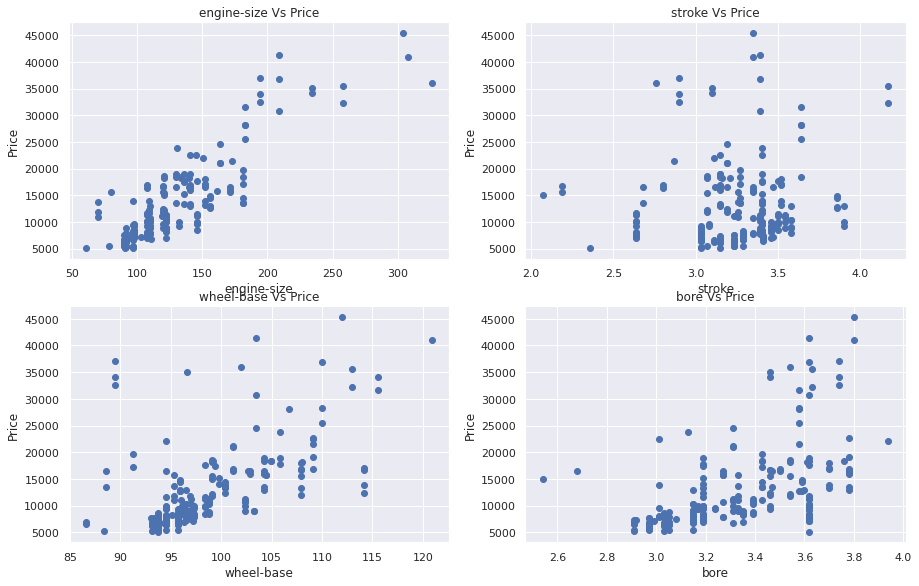

In [192]:
plt.figure(figsize=(15,20))
pairs('engine-size', 1)
pairs('stroke', 2)
pairs('wheel-base', 3)
pairs('bore', 4)

Deductions


1.   `engine-size`, `bore-ratio`, and `wheel-base` of cars have postive relationships with car prices.
2.   `stroke` has close to no relationship with car prices.



Create bins to classify car prices into `Low-end`, `Mid-end`, and `High-end` car prices to  fit into linear regression model.

In [193]:
ranges = ['Low-end', 'Mid-end', 'High-end']
bin = np.linspace(min(df['price']), max(df['price']), 4)
df['range'] = pd.cut(df['price'], bin, labels=ranges, include_lowest = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,range
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,Low-end
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,Low-end
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,Low-end
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,Low-end
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,Low-end


Text(0.5, 1.0, 'Denomination of Cars by Prices Range')

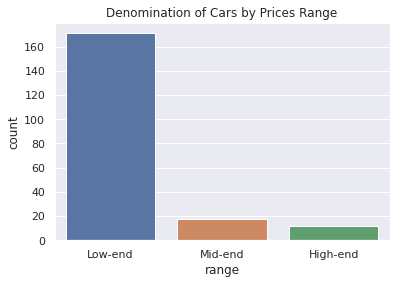

In [194]:
sns.countplot(x = 'range', data = df)
plt.title('Denomination of Cars by Prices Range')

The data is skewed towards `Low-end` cars than `Mid-end` and `High-end`

Correlation Between Numeric Variables and Price



In [195]:
from scipy import stats

In [196]:
def correlation(x):
  pearson_coef, p_value = stats.pearsonr(x, df['price'])
  print('The pearson coefficient:', pearson_coef, ' and p_value is:', p_value,)

In [197]:
correlation(df['horsepower'])
correlation(df['bore'])
correlation(df['stroke'])
correlation(df['highway-mpg'])
correlation(df['city-mpg'])
correlation(df['peak-rpm'])
correlation(df['normalized-losses'])
correlation(df['symboling'])
correlation(df['engine-size'])
correlation(df['wheel-base'])
correlation(df['length'])
correlation(df['width'])
correlation(df['curb-weight'])
correlation(df['height'])

The pearson coefficient: 0.8095745670036559  and p_value is: 6.369057428260101e-48
The pearson coefficient: 0.5431553832626602  and p_value is: 8.049189483935489e-17
The pearson coefficient: 0.08226928855325814  and p_value is: 0.24561612487745918
The pearson coefficient: -0.704692265058953  and p_value is: 1.7495471144476358e-31
The pearson coefficient: -0.6865710067844678  and p_value is: 2.321132065567641e-29
The pearson coefficient: -0.10161587407588148  and p_value is: 0.1511769165144532
The pearson coefficient: 0.13399873429274337  and p_value is: 0.05789749352703121
The pearson coefficient: -0.08239118716962357  and p_value is: 0.2449148765716521
The pearson coefficient: 0.8723351674455185  and p_value is: 9.265491622198389e-64
The pearson coefficient: 0.584641822265508  and p_value is: 8.076488270733218e-20
The pearson coefficient: 0.6906283804483639  and p_value is: 8.016477466159328e-30
The pearson coefficient: 0.7512653440522674  and p_value is: 9.200335510481516e-38
The pea

From our correlation function we can determine that variables like `horsepower`, `bore`, `engine-size`, `length`, `width`, `curb-weight` and `wheel-base` have relationships with car prices. 
Basically any predictor variable that has a `pearson correlation` value of less than 0.5 and  a `p-value` less than 0.05 is not relevant in building our linear regression model.

Setting dummy variables for categorical variables


In [198]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,range
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,Low-end
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,Low-end
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,Low-end
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,Low-end
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,Low-end


In [199]:
for column in df[['body-style', 'drive-wheels',
                  'engine-location', 'fuel-type',
                  'num-of-cylinders', 'engine-type',
                  'aspiration', 'range', 'fuel-system', 'num-of-doors']]:
  columnseriesobj = df[column]
  print('unique values for', column,':', columnseriesobj.unique())

unique values for body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
unique values for drive-wheels : ['rwd' 'fwd' '4wd']
unique values for engine-location : ['front' 'rear']
unique values for fuel-type : ['gas' 'diesel']
unique values for num-of-cylinders : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
unique values for engine-type : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
unique values for aspiration : ['std' 'turbo']
unique values for range : ['Low-end', 'Mid-end', 'High-end']
Categories (3, object): ['Low-end' < 'Mid-end' < 'High-end']
unique values for fuel-system : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
unique values for num-of-doors : ['two' 'four']


In [200]:
X = df
y = df.pop('price')

In [201]:
from sklearn import preprocessing
model_body_style = preprocessing.LabelEncoder()
model_body_style.fit(['convertible', 'hatchback' ,'sedan' ,'wagon', 'hardtop'])
X['body-style'] = model_body_style.transform(X['body-style'])

model_drive_wheels = preprocessing.LabelEncoder()
model_drive_wheels.fit(['rwd', 'fwd', '4wd'])
X['drive-wheels'] = model_drive_wheels.transform(X['drive-wheels'])

model_engine_location = preprocessing.LabelEncoder()
model_engine_location.fit(['front', 'rear'])
X['engine-location'] = model_engine_location.transform(X['engine-location'])

model_fuel_type = preprocessing.LabelEncoder()
model_fuel_type.fit(['gas', 'diesel'])
X['fuel-type'] = model_fuel_type.transform(X['fuel-type'])
X.head()

model_num_of_cylinders = preprocessing.LabelEncoder()
model_num_of_cylinders.fit(['four' ,'six', 'five' ,
                            'three', 'twelve', 'two' ,'eight'])
X['num-of-cylinders'] = model_num_of_cylinders.transform(X['num-of-cylinders'])

model_aspiration = preprocessing.LabelEncoder()
model_aspiration.fit(['std', 'turbo'])
X['aspiration'] = model_aspiration.transform(X['aspiration'])

model_engine_type = preprocessing.LabelEncoder()
model_engine_type.fit(['dohc','ohcv','ohc','l','rotor','ohcf'])
X['engine-type'] = model_engine_type.transform(X['engine-type'])

model_range = preprocessing.LabelEncoder()
model_range.fit(['Low-end', 'Mid-end', 'High-end'])
X['range'] = model_range.transform(X['range'])

model_fuel_system = preprocessing.LabelEncoder()
model_fuel_system.fit(['mpfi','2bbl', 'mfi', '1bbl', 'spfi', '4bbl',
                       'idi', 'spdi'])
X['fuel-system'] = model_fuel_system.transform(X['fuel-system'])

model_num_of_doors = preprocessing.LabelEncoder()
model_num_of_doors.fit(['two', 'four'])
X['num-of-doors'] = model_num_of_doors.transform(X['num-of-doors'])

In [202]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,range
0,3,122.0,alfa-romero,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,1
1,3,122.0,alfa-romero,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,1
2,1,122.0,alfa-romero,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,1
3,2,164,audi,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,1
4,2,164,audi,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,1


In [203]:
X = X[['drive-wheels', 'wheel-base', 'length', 'width', 'curb-weight',
         'engine-size', 'fuel-system', 'bore', 
         'horsepower', 'city-mpg', 'highway-mpg', 'body-style', 'num-of-cylinders', 'fuel-type', 'aspiration', 'symboling']]

### Train Test Split

It is standard practice to split data into training and testing sets when building machine learning models

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                       test_size= 0.3, random_state = 400)

In [205]:
print(X_train.shape)
print(y_train.shape)

(140, 16)
(140,)


### Normalization

Several numerical variables in our data have different scales so it would be better to normalize to set a common scale

In [206]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
car_numeric = ['length', 'width', 'engine-size', 'horsepower', 
               'curb-weight','bore', 'wheel-base', 
                'engine-size', 'bore', 
            'city-mpg', 'highway-mpg', ]
X_train[car_numeric] = trans.fit_transform(X_train[car_numeric])

In [207]:
X_train.head()

,drive-wheels,wheel-base,length,width,curb-weight,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,body-style,num-of-cylinders,fuel-type,aspiration,symboling
59,1,0.355685,0.547761,0.529915,0.357642,0.230189,1,0.563492,0.168224,0.361111,0.421053,3,2,1,0,0
86,1,0.230321,0.361194,0.299145,0.155547,0.135849,1,0.373016,0.098131,0.500000,0.552632,3,2,1,0,1
156,1,0.265306,0.376119,0.350427,0.235066,0.139623,1,0.404762,0.102804,0.694444,0.815789,3,2,1,0,0
9,2,0.425656,0.532836,0.384615,0.351823,0.177358,5,0.650794,0.247664,0.277778,0.342105,3,2,1,0,2
63,2,0.533528,0.505970,0.495726,0.470132,0.275472,3,0.595238,0.112150,0.500000,0.605263,3,2,0,0,0


Import model package

In [208]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [209]:
X_train.columns

Index(['drive-wheels', 'wheel-base', 'length', 'width', 'curb-weight',
       'engine-size', 'fuel-system', 'bore', 'horsepower', 'city-mpg',
       'highway-mpg', 'body-style', 'num-of-cylinders', 'fuel-type',
       'aspiration', 'symboling'],
      dtype='object')

In [210]:
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.8461194734138984

In [211]:
trans = MinMaxScaler()
car_num = ['length', 'width', 'engine-size', 'horsepower', 
               'curb-weight','bore', 'wheel-base', 
                'engine-size', 'bore', 
            'city-mpg', 'highway-mpg']
X_test[car_num] = trans.fit_transform(X_test[car_num])

In [212]:
y_hat = lm.predict(X_test)

### Model Evaluation

In [213]:
from sklearn.metrics import r2_score

print("Residual sum of squares: %.2f"% np.mean((y_hat - y_test) ** 2))
print('Variance score: %.2f' % lm.score(X_test, y_test))
print("R2-score: %.2f" % r2_score(y_hat , y_test))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))

Residual sum of squares: 18028664.84
Variance score: 0.66
R2-score: 0.79
Mean absolute error: 3424.25


In [214]:
from sklearn.metrics import mean_squared_error
print('Mean squred error: ', mean_squared_error(y_test, y_hat))

Mean squred error:  18028664.838254213


In [215]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [216]:
cv = KFold(n_splits=130, random_state=100, shuffle=True)
scores = cross_val_score(lm, X_train, y_train,
                         scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

np.mean(np.absolute(scores))

2633.548341019541

Text(0, 0.5, 'y_hat')

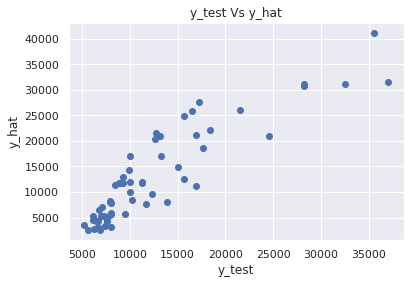

In [217]:
fig = plt.figure()
plt.scatter(y_test,y_hat)
plt.title('y_test Vs y_hat')
plt.xlabel('y_test')                       
plt.ylabel('y_hat')  

This graph shows positive relationships between our car prices predictions and the actual car prices.

#### Test for Multicollinearity Using Variance Inflation Factor

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [219]:
vif = pd.DataFrame()
x_vif = df[['length', 'width', 'engine-size', 'horsepower', 'curb-weight',
          'bore', 'wheel-base']]

In [220]:
vif["feature"] = x_vif.columns
vif["VIF"] = [variance_inflation_factor(x_vif.values, i)
                          for i in range(len(x_vif.columns))]
print(vif)

       feature          VIF
0       length  1649.489329
1        width  1184.373369
2  engine-size    52.322465
3   horsepower    38.693587
4  curb-weight   216.696176
5         bore   267.762667
6   wheel-base  1674.707344


Text(0.5, 1.0, 'HeatMap for Predictor Variables')

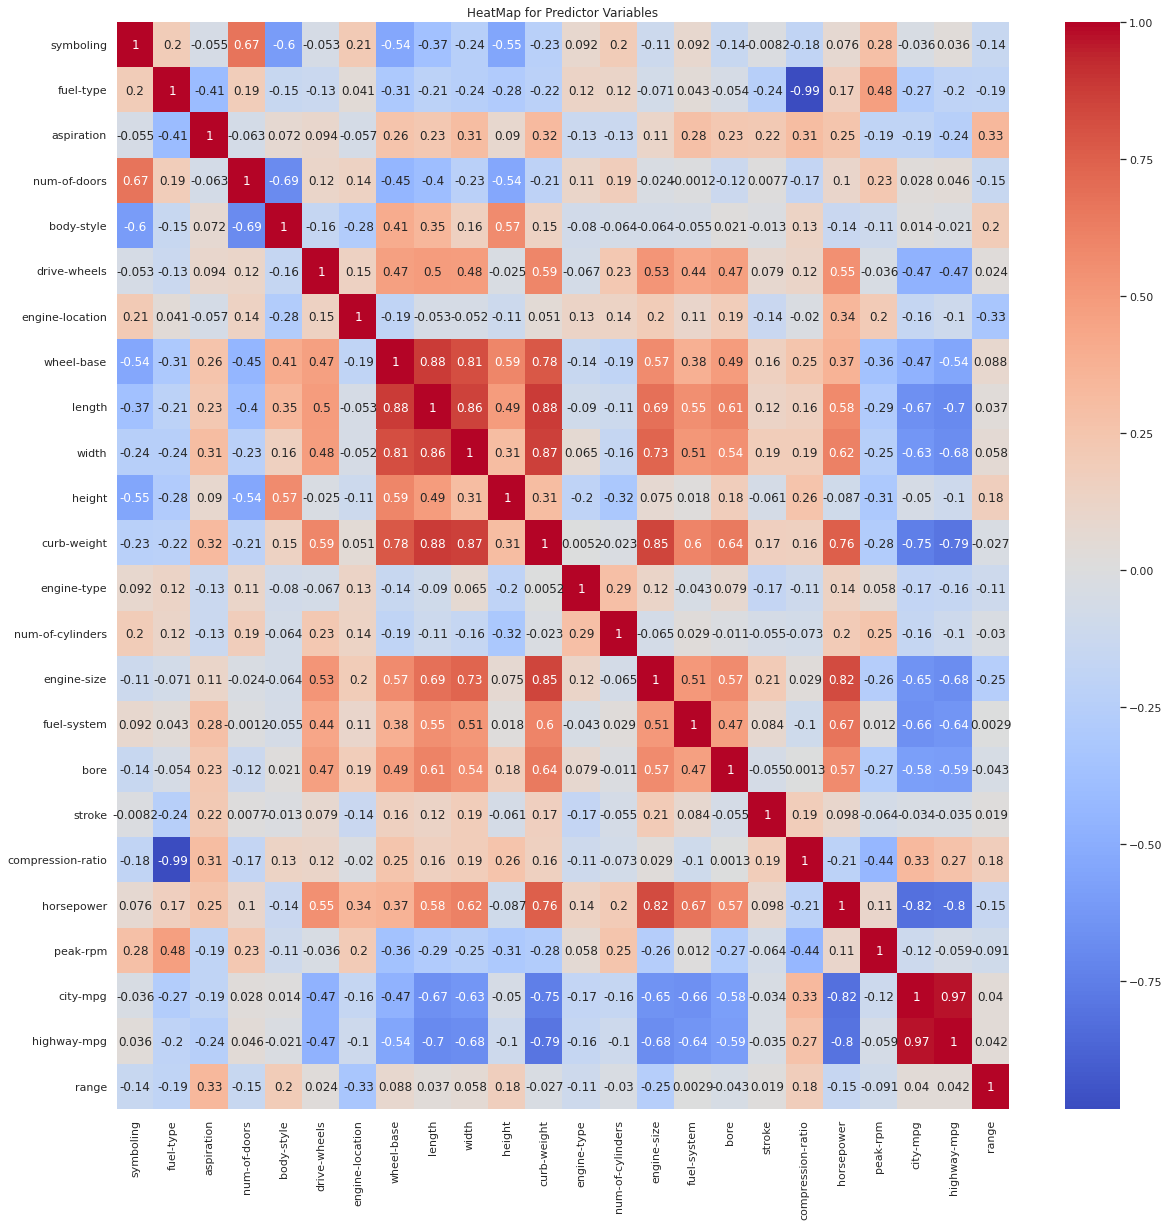

In [221]:
df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.title('HeatMap for Predictor Variables')

From our heatmap I noticed there is multicollinearity between some of our predictor variables, and to curb the effects of multicollinearity you can employ methods like removing some of those variables which have high multicollinearity or using Ridge Regression. I have chosen to use Ridge Regression to curb this issue.

### Ridge Model

In [222]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=1)

In [223]:
RidgeModel.fit(X_train, y_train)
RidgeModel.score(X_train,y_train)

0.833944400346793

In [224]:
Y_hat = RidgeModel.predict(X_test)

In [225]:
print("Residual sum of squares: %.2f"% np.mean((Y_hat - y_test) ** 2))
print('Variance score: %.2f' % RidgeModel.score(X_test, y_test))
print("R2-score: %.2f" % r2_score(Y_hat , y_test))
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_hat - y_test)))

Residual sum of squares: 15090702.28
Variance score: 0.72
R2-score: 0.79
Mean absolute error: 3243.27


Text(0, 0.5, 'Y_hat')

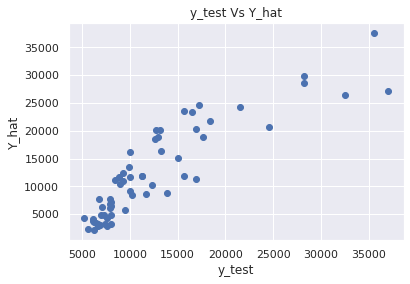

In [226]:
fig = plt.figure()
plt.scatter(y_test,Y_hat)
plt.title('y_test Vs Y_hat')
plt.xlabel('y_test')                       
plt.ylabel('Y_hat')  

###Conclusion
All predictor variables had a Pearsons coefficient greater than 0.5 and p-values of less than 0.05 which make them useful in our model development.
Between our Linear Regression and Ridge Regression Model, the Ridge mode performed better than Linear, making the Ridge Model our best model to predict car prices.